In [2]:
import numpy as np
import pandas as pd
import torch
import pickle

from tqdm import tnrange, tqdm_notebook
from tqdm.autonotebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
#solved chinese display in matplotlib
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams["font.family"] = "DFKai-SB"
rcParams['axes.unicode_minus'] = False

from Model import EncoderOneLayer
from ArticlesRep import MeanSimilarityoneindustry,MeanSimilaritytwoindustry
def IQR(array):
    Q3,Q1=np.percentile(array,[75,25])
    return Q3-Q1

## Load model & trainset & testset & dict_guid_onehot

In [4]:
model=EncoderOneLayer(20000,100)
model.load_state_dict(torch.load("EncoderState.pt",map_location='cpu'))
model.eval()
for p in model.parameters():
    p.requires_grad_(False)
# with open("dict_train_industry_guid.p","rb") as f:
#     dict_train_industry_guid=pickle.load(f)
with open("dict_test_industry_guid.p","rb") as f:
    dict_test_industry_guid=pickle.load(f)
with open("D:4.AutoencoderForArticle.Mid-Industry/dict_guid_sparsebow_20000_single.v05.p","rb") as f:
    dict_guid_sparsebow_20000_single=pickle.load(f)

#### Testset 

In [ ]:
li=[]
model=model
dict_collect_industry=dict_test_industry_guid
bow=dict_guid_sparsebow_20000_single
for k in tqdm_notebook(dict_collect_industry):
    array1=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[k]],dtype=np.float32).squeeze()
    if len(array1)!=0:
        array1=model(torch.from_numpy(array1)).numpy()
        for j in dict_collect_industry:
                array2=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[j]],dtype=np.float32).squeeze()
                if len(array2)!=0:
                    array2=model(torch.from_numpy(array2)).numpy()
                    simi=MeanSimilaritytwoindustry(array1,array2)
                    print(k,j,simi)
                    li.append((k,j,simi))

飲料相關 飲料相關 0.4475842
飲料相關 運動產業 0.035639193
飲料相關 不鏽鋼 -0.009602735
飲料相關 條鋼 0.001980113
飲料相關 電子通路 -0.08562344
飲料相關 電線電纜 -0.003945736
飲料相關 車輛整車 0.058638807
飲料相關 面板零組件 -0.08501119
飲料相關 分離式元件 -0.057909597
飲料相關 運輸事業 0.0071702627
飲料相關 電力設備 0.024035508
飲料相關 服務業 0.094810344
飲料相關 顯示器 0.0029541228
飲料相關 IC封裝測試 -0.047681924
飲料相關 電子其他 -0.03828785
飲料相關 造紙業 0.01217524
飲料相關 手機 -0.026686437
飲料相關 橡膠工業 -0.0088498015
飲料相關 石化業 0.02246131
飲料相關 光通訊 -0.03136387
飲料相關 大宗物資 0.04685351
飲料相關 醫療器材通路 -0.034329135
飲料相關 電子零件元件 -0.10630836
飲料相關 紡織中游 0.0462929
飲料相關 成衣 -0.001258378
飲料相關 IC設計 -0.05851161
飲料相關 通訊服務 -0.069919884
飲料相關 被動元件 -0.15182094
飲料相關 電腦系統業 -0.07651235
飲料相關 機械 -0.044255797
飲料相關 貴金屬 0.03786973
飲料相關 面板業 -0.026188351
飲料相關 水資源 0.07351592
飲料相關 醫藥產業 0.032203194
飲料相關 水泥 -0.052872073
飲料相關 休閒娛樂 0.02309731
飲料相關 週邊產品 -0.09983545
飲料相關 農林漁牧 0.01587057
飲料相關 封測服務與材料 -0.06846161
飲料相關 電聲產品 -0.01624623
飲料相關 其他公用事業 -0.009997883
飲料相關 軟體業 -0.04480075
飲料相關 航天軍工 0.01525439
飲料相關 礦石開採 0.0130951265
飲料相關 家居用品 0.0714418
飲料相關 板鋼 -0.03

電子通路 LED 0.05126087
電子通路 家電 -0.0007797034
電子通路 通訊設備 0.06956348
電子通路 合金鋼 -0.084832236
電子通路 時尚產業 -0.030352136
電子通路 傳播事業 0.029011386
電子通路 IC製造 0.1717249
電子通路 化纖原料 -0.037833072
電子通路 Internet相關 -0.030226776
電子通路 石油及天然氣 -0.10685916
電子通路 傳產其他 0.04786639
電子通路 旅館、餐飲 -0.040263228
電子通路 設備儀器廠商 0.217423
電子通路 地產 -0.055942383
電子通路 消費性電子產品 0.017490262
電子通路 建材 -0.012606364
電子通路 線材、盤元 -0.047579605
電子通路 輔助與彌補用醫材 0.0108655095
電子通路 印刷電路板相關 0.05790599
電子通路 化學工業 0.09594364
電子通路 太陽能 -0.06325589
電線電纜 飲料相關 -0.0039457376
電線電纜 運動產業 -0.089231595
電線電纜 不鏽鋼 0.100969
電線電纜 條鋼 0.0012878488
電線電纜 電子通路 -0.017624082
電線電纜 電線電纜 0.58672786
電線電纜 車輛整車 -0.045831878
電線電纜 面板零組件 -0.016025392
電線電纜 分離式元件 0.044001684
電線電纜 運輸事業 -0.076056436
電線電纜 電力設備 0.117715344
電線電纜 服務業 -0.08758897
電線電纜 顯示器 -0.024080431
電線電纜 IC封裝測試 -0.005917197
電線電纜 電子其他 0.03908937
電線電纜 造紙業 0.00089961034
電線電纜 手機 -0.053661693
電線電纜 橡膠工業 -0.031700835
電線電纜 石化業 -0.028478114
電線電纜 光通訊 0.08438127
電線電纜 大宗物資 -0.03461481
電線電纜 醫療器材通路 0.0478367
電線電纜 電子零件元件 0.098673224
電線電纜 紡織中游 0.0

運輸事業 光通訊 -0.024596173
運輸事業 大宗物資 0.024437705
運輸事業 醫療器材通路 -0.03392719
運輸事業 電子零件元件 -0.07925809
運輸事業 紡織中游 0.0123048965
運輸事業 成衣 -0.06502949
運輸事業 IC設計 -0.052516587
運輸事業 通訊服務 0.052306738
運輸事業 被動元件 -0.07965046
運輸事業 電腦系統業 -0.06805539
運輸事業 機械 0.055091713
運輸事業 貴金屬 -0.07714606
運輸事業 面板業 -0.09365679
運輸事業 水資源 0.015713125
運輸事業 醫藥產業 0.01869658
運輸事業 水泥 0.08424291
運輸事業 休閒娛樂 0.200967
運輸事業 週邊產品 -0.07412711
運輸事業 農林漁牧 -0.032446958
運輸事業 封測服務與材料 -0.06871398
運輸事業 電聲產品 -0.05601848
運輸事業 其他公用事業 0.12842372
運輸事業 軟體業 -0.041268785
運輸事業 航天軍工 0.2048588
運輸事業 礦石開採 -0.017615043
運輸事業 家居用品 0.047160987
運輸事業 板鋼 0.017847437
運輸事業 光碟片 0.045293156
運輸事業 手機零組件 -0.025792925
運輸事業 營造工程 -0.039718024
運輸事業 電力 -0.01986532
運輸事業 食品加工 0.015115613
運輸事業 數位相機 -0.007219702
運輸事業 基礎建設營運 0.19966944
運輸事業 非鐵金屬 -0.09300681
運輸事業 流通業 0.018186882
運輸事業 金融業 0.032225285
運輸事業 遊戲產業 -0.06299818
運輸事業 汽機車零組件 -0.00013320909
運輸事業 生物科技 -0.005175793
運輸事業 LED -0.10153325
運輸事業 家電 -0.016457923
運輸事業 通訊設備 -0.04295581
運輸事業 合金鋼 -0.052591953
運輸事業 時尚產業 0.026286274
運輸事業 傳播事業 -

IC封裝測試 Internet相關 -0.057798926
IC封裝測試 石油及天然氣 -0.08538343
IC封裝測試 傳產其他 -0.06604294
IC封裝測試 旅館、餐飲 -0.03409671
IC封裝測試 設備儀器廠商 0.20370114
IC封裝測試 地產 0.00784881
IC封裝測試 消費性電子產品 -0.05732355
IC封裝測試 建材 -0.019361062
IC封裝測試 線材、盤元 -0.047275033
IC封裝測試 輔助與彌補用醫材 -0.05020752
IC封裝測試 印刷電路板相關 0.064989835
IC封裝測試 化學工業 -0.03452149
IC封裝測試 太陽能 0.010854919
電子其他 飲料相關 -0.038287845
電子其他 運動產業 -0.018974595
電子其他 不鏽鋼 -0.07281256
電子其他 條鋼 -0.015933374
電子其他 電子通路 0.15136084
電子其他 電線電纜 0.03908937
電子其他 車輛整車 -0.049907066
電子其他 面板零組件 0.045975234
電子其他 分離式元件 -0.052476075
電子其他 運輸事業 -0.04890254
電子其他 電力設備 0.12054675
電子其他 服務業 0.019866755
電子其他 顯示器 -0.00040993912
電子其他 IC封裝測試 0.021535445
電子其他 電子其他 0.26307303
電子其他 造紙業 -0.056205917
電子其他 手機 0.013096635
電子其他 橡膠工業 -0.049500406
電子其他 石化業 -0.02184834
電子其他 光通訊 -0.047105182
電子其他 大宗物資 -0.08639385
電子其他 醫療器材通路 0.015393172
電子其他 電子零件元件 0.0545966
電子其他 紡織中游 0.023912491
電子其他 成衣 0.01982021
電子其他 IC設計 0.0021319394
電子其他 通訊服務 0.056097664
電子其他 被動元件 0.028002795
電子其他 電腦系統業 0.031433642
電子其他 機械 0.03589903
電子其他 貴金屬 -0

石化業 家居用品 -0.030679552
石化業 板鋼 -0.03939092
石化業 光碟片 0.0709689
石化業 手機零組件 -0.034496248
石化業 營造工程 -0.009752217
石化業 電力 0.0481001
石化業 食品加工 -0.0339793
石化業 數位相機 -0.05230972
石化業 基礎建設營運 -0.02490496
石化業 非鐵金屬 0.016636342
石化業 流通業 -0.06117088
石化業 金融業 -0.019591192
石化業 遊戲產業 -0.045422684
石化業 汽機車零組件 0.036899835
石化業 生物科技 0.06067281
石化業 LED -0.0039117746
石化業 家電 -0.040304873
石化業 通訊設備 -0.028512217
石化業 合金鋼 0.08702779
石化業 時尚產業 -0.08568358
石化業 傳播事業 -0.031303875
石化業 IC製造 -0.0048325136
石化業 化纖原料 0.33982787
石化業 Internet相關 -0.07391073
石化業 石油及天然氣 0.033519775
石化業 傳產其他 0.037418988
石化業 旅館、餐飲 -0.035688575
石化業 設備儀器廠商 0.026047446
石化業 地產 -0.019990606
石化業 消費性電子產品 -0.026881697
石化業 建材 -0.007308648
石化業 線材、盤元 -0.06167484
石化業 輔助與彌補用醫材 0.017784055
石化業 印刷電路板相關 0.043610293
石化業 化學工業 0.2927067
石化業 太陽能 -0.029250678
光通訊 飲料相關 -0.03136387
光通訊 運動產業 0.060048144
光通訊 不鏽鋼 -0.034798097
光通訊 條鋼 -0.13690189
光通訊 電子通路 -0.0048190574
光通訊 電線電纜 0.08438127
光通訊 車輛整車 -0.037403792
光通訊 面板零組件 0.028441723
光通訊 分離式元件 0.12909187
光通訊 運輸事業 -0.024596173
光通訊 電力設備 -0.05

紡織中游 不鏽鋼 0.022001734
紡織中游 條鋼 0.029009175
紡織中游 電子通路 0.036024656
紡織中游 電線電纜 0.03365893
紡織中游 車輛整車 -0.039844673
紡織中游 面板零組件 0.04271379
紡織中游 分離式元件 -0.10190154
紡織中游 運輸事業 0.0123048965
紡織中游 電力設備 -0.01649257
紡織中游 服務業 0.0026606405
紡織中游 顯示器 0.009741662
紡織中游 IC封裝測試 -0.07362819
紡織中游 電子其他 0.023912491
紡織中游 造紙業 0.032671425
紡織中游 手機 -0.06942544
紡織中游 橡膠工業 0.045836188
紡織中游 石化業 0.12150267
紡織中游 光通訊 -0.04950662
紡織中游 大宗物資 0.102612406
紡織中游 醫療器材通路 0.012065448
紡織中游 電子零件元件 -0.0059045916
紡織中游 紡織中游 0.45702273
紡織中游 成衣 0.39412686
紡織中游 IC設計 -0.07940686
紡織中游 通訊服務 -0.06433386
紡織中游 被動元件 0.024262583
紡織中游 電腦系統業 -0.02953629
紡織中游 機械 0.023026042
紡織中游 貴金屬 -0.030974474
紡織中游 面板業 0.042816836
紡織中游 水資源 -0.08443121
紡織中游 醫藥產業 -0.0108899735
紡織中游 水泥 0.06314768
紡織中游 休閒娛樂 -0.041134086
紡織中游 週邊產品 -0.032550983
紡織中游 農林漁牧 0.05528154
紡織中游 封測服務與材料 -0.013650599
紡織中游 電聲產品 -0.022606695
紡織中游 其他公用事業 0.0024035517
紡織中游 軟體業 -0.046475902
紡織中游 航天軍工 -0.060682338
紡織中游 礦石開採 0.0019652224
紡織中游 家居用品 0.02010645
紡織中游 板鋼 -0.017149864
紡織中游 光碟片 0.088032745
紡織中游 手機零組件

被動元件 生物科技 2.582803e-05
被動元件 LED 0.1838372
被動元件 家電 -0.08525951
被動元件 通訊設備 0.035895783
被動元件 合金鋼 -0.017942343
被動元件 時尚產業 -0.007321894
被動元件 傳播事業 -0.008933797
被動元件 IC製造 0.0058225403
被動元件 化纖原料 -0.031512138
被動元件 Internet相關 -0.1131483
被動元件 石油及天然氣 0.0028129956
被動元件 傳產其他 0.012554076
被動元件 旅館、餐飲 -0.06448697
被動元件 設備儀器廠商 0.057228874
被動元件 地產 -0.08796787
被動元件 消費性電子產品 -0.047642697
被動元件 建材 0.01600512
被動元件 線材、盤元 0.028383162
被動元件 輔助與彌補用醫材 0.019188425
被動元件 印刷電路板相關 0.14405607
被動元件 化學工業 -0.04364885
被動元件 太陽能 -0.022212213
電腦系統業 飲料相關 -0.07651236
電腦系統業 運動產業 -0.008941551
電腦系統業 不鏽鋼 -0.062379364
電腦系統業 條鋼 -0.09539561
電腦系統業 電子通路 0.14172362
電腦系統業 電線電纜 0.00036654584
電腦系統業 車輛整車 0.0020922637
電腦系統業 面板零組件 0.035331342
電腦系統業 分離式元件 0.006861331
電腦系統業 運輸事業 -0.068055384
電腦系統業 電力設備 0.05342167
電腦系統業 服務業 -0.025080977
電腦系統業 顯示器 0.1278854
電腦系統業 IC封裝測試 -0.03154392
電腦系統業 電子其他 0.03143364
電腦系統業 造紙業 -0.04697568
電腦系統業 手機 0.07797342
電腦系統業 橡膠工業 0.010788994
電腦系統業 石化業 -0.013397829
電腦系統業 光通訊 -0.03042456
電腦系統業 大宗物資 -0.05050042
電腦系統業 醫療器材通路 -0.0203

水資源 電聲產品 -0.028221993
水資源 其他公用事業 0.073710956
水資源 軟體業 0.0031115925
水資源 航天軍工 0.048408218
水資源 礦石開採 -0.06209787
水資源 家居用品 -0.012088697
水資源 板鋼 -0.051076632
水資源 光碟片 -0.03882234
水資源 手機零組件 0.00095944054
水資源 營造工程 0.08398943
水資源 電力 0.20557849
水資源 食品加工 0.013682993
水資源 數位相機 0.011191568
水資源 基礎建設營運 0.1323189
水資源 非鐵金屬 -0.01401881
水資源 流通業 -0.047814373
水資源 金融業 0.00010044068
水資源 遊戲產業 -0.007047846
水資源 汽機車零組件 -0.041685037
水資源 生物科技 -0.021167869
水資源 LED -0.07708327
水資源 家電 -0.048827033
水資源 通訊設備 -0.06487667
水資源 合金鋼 -0.013513981
水資源 時尚產業 -0.057870086
水資源 傳播事業 0.06779379
水資源 IC製造 -0.032651097
水資源 化纖原料 -0.06556755
水資源 Internet相關 0.0530387
水資源 石油及天然氣 0.095904015
水資源 傳產其他 -0.03518637
水資源 旅館、餐飲 -0.05841046
水資源 設備儀器廠商 -0.086349785
水資源 地產 0.069223836
水資源 消費性電子產品 -0.027196413
水資源 建材 -0.052228075
水資源 線材、盤元 -0.048655506
水資源 輔助與彌補用醫材 -0.08351631
水資源 印刷電路板相關 -0.07540425
水資源 化學工業 -0.035396323
水資源 太陽能 0.0056648734
醫藥產業 飲料相關 0.03220319
醫藥產業 運動產業 0.018693598
醫藥產業 不鏽鋼 0.06478586
醫藥產業 條鋼 -0.04602052
醫藥產業 電子通路 -0.008191216
醫藥產業 電

農林漁牧 電子其他 -0.085725576
農林漁牧 造紙業 -0.044210583
農林漁牧 手機 -0.008249914
農林漁牧 橡膠工業 -0.027312918
農林漁牧 石化業 -0.05138707
農林漁牧 光通訊 -0.041356765
農林漁牧 大宗物資 0.53794736
農林漁牧 醫療器材通路 -0.066604
農林漁牧 電子零件元件 -0.04463626
農林漁牧 紡織中游 0.05528154
農林漁牧 成衣 -0.036287572
農林漁牧 IC設計 -0.043946426
農林漁牧 通訊服務 -0.03796736
農林漁牧 被動元件 0.00413596
農林漁牧 電腦系統業 -0.043388378
農林漁牧 機械 -0.036953487
農林漁牧 貴金屬 0.08808688
農林漁牧 面板業 -0.01024495
農林漁牧 水資源 0.10446967
農林漁牧 醫藥產業 -0.0742465
農林漁牧 水泥 0.011032403
農林漁牧 休閒娛樂 -0.022962596
農林漁牧 週邊產品 -0.041215207
農林漁牧 農林漁牧 0.54089665
農林漁牧 封測服務與材料 -0.01356126
農林漁牧 電聲產品 -0.0028148752
農林漁牧 其他公用事業 0.02456828
農林漁牧 軟體業 -0.041377638
農林漁牧 航天軍工 -0.10310496
農林漁牧 礦石開採 0.15010454
農林漁牧 家居用品 -0.020585874
農林漁牧 板鋼 0.0456621
農林漁牧 光碟片 -0.040095214
農林漁牧 手機零組件 -0.0038231388
農林漁牧 營造工程 -0.056499448
農林漁牧 電力 0.10719276
農林漁牧 食品加工 0.16516589
農林漁牧 數位相機 0.021242201
農林漁牧 基礎建設營運 0.043990023
農林漁牧 非鐵金屬 0.27538902
農林漁牧 流通業 0.0037966007
農林漁牧 金融業 -0.029000273
農林漁牧 遊戲產業 -0.004292879
農林漁牧 汽機車零組件 -0.0071298876
農林漁牧 生物科技 -0.05757018
農林漁牧 LED 

軟體業 板鋼 -0.07478242
軟體業 光碟片 0.06667725
軟體業 手機零組件 0.04060206
軟體業 營造工程 0.0039506876
軟體業 電力 -0.021573074
軟體業 食品加工 -0.08112816
軟體業 數位相機 -0.021462066
軟體業 基礎建設營運 -0.027590811
軟體業 非鐵金屬 -0.07125733
軟體業 流通業 -0.020580411
軟體業 金融業 0.04390263
軟體業 遊戲產業 0.17060824
軟體業 汽機車零組件 -0.044918317
軟體業 生物科技 -0.029002542
軟體業 LED -0.027859801
軟體業 家電 0.03502311
軟體業 通訊設備 0.10566742
軟體業 合金鋼 -0.028126877
軟體業 時尚產業 -0.034843568
軟體業 傳播事業 0.07319484
軟體業 IC製造 0.022886287
軟體業 化纖原料 -0.040956054
軟體業 Internet相關 0.20234813
軟體業 石油及天然氣 -0.0069426573
軟體業 傳產其他 -0.06703328
軟體業 旅館、餐飲 -0.020249441
軟體業 設備儀器廠商 0.028020162
軟體業 地產 0.003284889
軟體業 消費性電子產品 0.20402208
軟體業 建材 -0.031233836
軟體業 線材、盤元 -0.060030945
軟體業 輔助與彌補用醫材 -0.022987003
軟體業 印刷電路板相關 -0.0065428754
軟體業 化學工業 -0.06512305
軟體業 太陽能 -0.053356
航天軍工 飲料相關 0.015254389
航天軍工 運動產業 0.05731308
航天軍工 不鏽鋼 -0.07472293
航天軍工 條鋼 -0.054154266
航天軍工 電子通路 -0.06555544
航天軍工 電線電纜 -0.06331372
航天軍工 車輛整車 0.030957898
航天軍工 面板零組件 -0.064849876
航天軍工 分離式元件 -0.027880363
航天軍工 運輸事業 0.20485881
航天軍工 電力設備 -0.06143848
航天軍工

光碟片 醫療器材通路 -0.07466809
光碟片 電子零件元件 -0.008105358
光碟片 紡織中游 0.088032745
光碟片 成衣 0.06523008
光碟片 IC設計 0.048554193
光碟片 通訊服務 0.020387404
光碟片 被動元件 -0.03505661
光碟片 電腦系統業 0.036157653
光碟片 機械 -0.051834732
光碟片 貴金屬 0.028583905
光碟片 面板業 -0.003535315
光碟片 水資源 -0.038822345
光碟片 醫藥產業 -0.04997857
光碟片 水泥 -0.048720453
光碟片 休閒娛樂 -0.007436064
光碟片 週邊產品 0.27351558
光碟片 農林漁牧 -0.040095214
光碟片 封測服務與材料 -0.03740468
光碟片 電聲產品 -0.035812568
光碟片 其他公用事業 -0.052895334
光碟片 軟體業 0.06667725
光碟片 航天軍工 -0.012283668
光碟片 礦石開採 -0.04080822
光碟片 家居用品 -0.03251695
光碟片 板鋼 -0.05815006
光碟片 光碟片 0.6015775
光碟片 手機零組件 -0.042005025
光碟片 營造工程 -0.021019518
光碟片 電力 0.025295148
光碟片 食品加工 -0.0299117
光碟片 數位相機 0.07294919
光碟片 基礎建設營運 -0.061143808
光碟片 非鐵金屬 0.0015262581
光碟片 流通業 -0.024874145
光碟片 金融業 -0.008978276
光碟片 遊戲產業 -0.0058518513
光碟片 汽機車零組件 0.02406762
光碟片 生物科技 -0.022676263
光碟片 LED -0.046197798
光碟片 家電 0.053736176
光碟片 通訊設備 -0.02768266
光碟片 合金鋼 0.016541118
光碟片 時尚產業 -0.019848868
光碟片 傳播事業 0.07515004
光碟片 IC製造 -0.016172409
光碟片 化纖原料 0.0874261
光碟片 Internet相關 0.043215524
光碟

食品加工 線材、盤元 -0.0066518267
食品加工 輔助與彌補用醫材 0.0031939542
食品加工 印刷電路板相關 0.0015193833
食品加工 化學工業 0.032175608
食品加工 太陽能 -0.016196903
數位相機 飲料相關 -0.08861653
數位相機 運動產業 0.020796472
數位相機 不鏽鋼 -0.03053017
數位相機 條鋼 -0.012340712
數位相機 電子通路 -0.017546646
數位相機 電線電纜 -0.10488827
數位相機 車輛整車 0.0034529015
數位相機 面板零組件 0.06407029
數位相機 分離式元件 -0.011521954
數位相機 運輸事業 -0.007219702
數位相機 電力設備 -0.032111343
數位相機 服務業 -0.059350263
數位相機 顯示器 0.1615698
數位相機 IC封裝測試 -0.01254833
數位相機 電子其他 0.0043121222
數位相機 造紙業 -0.021385027
數位相機 手機 0.12603347
數位相機 橡膠工業 -0.0004990598
數位相機 石化業 -0.052309718
數位相機 光通訊 -0.028802203
數位相機 大宗物資 -0.0008561384
數位相機 醫療器材通路 -0.012307961
數位相機 電子零件元件 0.005169611
數位相機 紡織中游 -0.022781525
數位相機 成衣 0.034517676
數位相機 IC設計 0.013572625
數位相機 通訊服務 0.005502109
數位相機 被動元件 -0.00082091184
數位相機 電腦系統業 0.051167954
數位相機 機械 0.026484268
數位相機 貴金屬 -0.0013202479
數位相機 面板業 -0.009829981
數位相機 水資源 0.011191567
數位相機 醫藥產業 -0.05008936
數位相機 水泥 0.0043594493
數位相機 休閒娛樂 -4.9122154e-05
數位相機 週邊產品 0.2058014
數位相機 農林漁牧 0.0212422
數位相機 封測服務與材料 -0.0071551073
數位相機 電

金融業 其他公用事業 0.010495228
金融業 軟體業 0.043902636
金融業 航天軍工 0.04693641
金融業 礦石開採 -0.04957093
金融業 家居用品 -0.08001245
金融業 板鋼 -0.0058144643
金融業 光碟片 -0.008978276
金融業 手機零組件 -0.06617079
金融業 營造工程 0.1686544
金融業 電力 0.046103004
金融業 食品加工 0.0022026063
金融業 數位相機 -0.070897475
金融業 基礎建設營運 0.16228472
金融業 非鐵金屬 -0.11688134
金融業 流通業 0.17690924
金融業 金融業 0.46324995
金融業 遊戲產業 -0.06658723
金融業 汽機車零組件 0.014178674
金融業 生物科技 0.035872895
金融業 LED -0.056073472
金融業 家電 -0.044377137
金融業 通訊設備 -0.04065618
金融業 合金鋼 -0.03909178
金融業 時尚產業 0.09136166
金融業 傳播事業 0.061093286
金融業 IC製造 -0.012996644
金融業 化纖原料 0.036451418
金融業 Internet相關 0.08347816
金融業 石油及天然氣 0.010095382
金融業 傳產其他 0.00044372768
金融業 旅館、餐飲 -0.059652653
金融業 設備儀器廠商 -0.06495071
金融業 地產 0.18653873
金融業 消費性電子產品 -0.05455759
金融業 建材 -0.01620985
金融業 線材、盤元 0.0142489765
金融業 輔助與彌補用醫材 0.014564457
金融業 印刷電路板相關 -0.02823661
金融業 化學工業 -0.0343723
金融業 太陽能 0.012640225
遊戲產業 飲料相關 -0.039880425
遊戲產業 運動產業 -0.0437504
遊戲產業 不鏽鋼 -0.08196068
遊戲產業 條鋼 -0.038650595
遊戲產業 電子通路 -0.01933968
遊戲產業 電線電纜 0.009124682
遊戲產業 車輛整車 -0.003

家電 電線電纜 0.04448592
家電 車輛整車 0.08943714
家電 面板零組件 0.12853208
家電 分離式元件 -0.04227969
家電 運輸事業 -0.01645792
家電 電力設備 0.107183576
家電 服務業 -0.048400447
家電 顯示器 0.41209894
家電 IC封裝測試 -0.041118097
家電 電子其他 0.043181155
家電 造紙業 -0.07575727
家電 手機 0.046525795
家電 橡膠工業 0.017988771
家電 石化業 -0.040304873
家電 光通訊 -0.07092061
家電 大宗物資 0.007658579
家電 醫療器材通路 -0.02690795
家電 電子零件元件 0.023173874
家電 紡織中游 -0.00046074987
家電 成衣 -0.01685664
家電 IC設計 -0.034418784
家電 通訊服務 -0.036980562
家電 被動元件 -0.08525951
家電 電腦系統業 0.11571013
家電 機械 0.053130098
家電 貴金屬 -0.09667248
家電 面板業 0.1289948
家電 水資源 -0.04882704
家電 醫藥產業 -0.021282181
家電 水泥 0.0062990063
家電 休閒娛樂 -0.053253878
家電 週邊產品 0.063440785
家電 農林漁牧 -0.0068325526
家電 封測服務與材料 -0.04002569
家電 電聲產品 -0.083038494
家電 其他公用事業 -0.046402752
家電 軟體業 0.03502311
家電 航天軍工 -0.0699072
家電 礦石開採 -0.03736593
家電 家居用品 0.045674503
家電 板鋼 -0.026810052
家電 光碟片 0.053736176
家電 手機零組件 -0.07680353
家電 營造工程 0.008456262
家電 電力 0.022123316
家電 食品加工 0.05185609
家電 數位相機 0.09962249
家電 基礎建設營運 -0.03521211
家電 非鐵金屬 0.01265492
家電 流通業 0.0099366
家電 金

傳播事業 時尚產業 -0.043930013
傳播事業 傳播事業 0.3048281
傳播事業 IC製造 -0.0739996
傳播事業 化纖原料 -0.043848004
傳播事業 Internet相關 0.16241233
傳播事業 石油及天然氣 0.037556037
傳播事業 傳產其他 0.033762615
傳播事業 旅館、餐飲 -0.060838062
傳播事業 設備儀器廠商 -0.007369845
傳播事業 地產 0.044149026
傳播事業 消費性電子產品 0.074883714
傳播事業 建材 -0.022047037
傳播事業 線材、盤元 -0.061953373
傳播事業 輔助與彌補用醫材 -0.046698064
傳播事業 印刷電路板相關 0.014368397
傳播事業 化學工業 0.0016036533
傳播事業 太陽能 -0.06870858
IC製造 飲料相關 -0.07592377
IC製造 運動產業 -0.052103467
IC製造 不鏽鋼 -0.042216443
IC製造 條鋼 -0.01254815
IC製造 電子通路 0.17172492
IC製造 電線電纜 -0.015276232
IC製造 車輛整車 -0.030988406
IC製造 面板零組件 0.0059263064
IC製造 分離式元件 0.14143611
IC製造 運輸事業 -0.05579169
IC製造 電力設備 -0.09067093
IC製造 服務業 -0.034253933
IC製造 顯示器 0.03399277
IC製造 IC封裝測試 0.37527364
IC製造 電子其他 0.03180116
IC製造 造紙業 0.016326781
IC製造 手機 0.05664549
IC製造 橡膠工業 0.0069531198
IC製造 石化業 -0.004832513
IC製造 光通訊 0.057032373
IC製造 大宗物資 -0.057384297
IC製造 醫療器材通路 0.02641544
IC製造 電子零件元件 0.05832764
IC製造 紡織中游 -0.090827495
IC製造 成衣 -0.051608097
IC製造 IC設計 0.28724626
IC製造 通訊服務 0.028266445
IC製造 被動元件 0.0

傳產其他 運動產業 0.3320045
傳產其他 不鏽鋼 0.0010495665
傳產其他 條鋼 -0.014880756
傳產其他 電子通路 0.047866393
傳產其他 電線電纜 -0.069130465
傳產其他 車輛整車 -0.02562489
傳產其他 面板零組件 0.014150702
傳產其他 分離式元件 -0.017832408
傳產其他 運輸事業 -0.04198261
傳產其他 電力設備 -0.008186684
傳產其他 服務業 0.061325196
傳產其他 顯示器 -0.005231913
傳產其他 IC封裝測試 -0.06604294
傳產其他 電子其他 0.036447268
傳產其他 造紙業 0.014204197
傳產其他 手機 -0.044383995
傳產其他 橡膠工業 0.049324967
傳產其他 石化業 0.03741899
傳產其他 光通訊 -0.03160932
傳產其他 大宗物資 -0.025575763
傳產其他 醫療器材通路 0.00427095
傳產其他 電子零件元件 -0.016871683
傳產其他 紡織中游 0.16577955
傳產其他 成衣 0.23825414
傳產其他 IC設計 -0.050083537
傳產其他 通訊服務 -0.082339704
傳產其他 被動元件 0.012554074
傳產其他 電腦系統業 -0.047629535
傳產其他 機械 0.043498557
傳產其他 貴金屬 0.019512802
傳產其他 面板業 0.012252233
傳產其他 水資源 -0.03518637
傳產其他 醫藥產業 -0.020481046
傳產其他 水泥 -0.006172577
傳產其他 休閒娛樂 -0.03273839
傳產其他 週邊產品 0.0071537415
傳產其他 農林漁牧 -0.041552637
傳產其他 封測服務與材料 -0.0146616595
傳產其他 電聲產品 -0.008945068
傳產其他 其他公用事業 -0.0130245965
傳產其他 軟體業 -0.06703328
傳產其他 航天軍工 0.009208627
傳產其他 礦石開採 -0.0070189997
傳產其他 家居用品 0.16682267
傳產其他 板鋼 -0.047082257
傳

In [4]:
df_trainAE=pd.DataFrame(li)
df_trainAE=df_trainAE.pivot(index=0,columns=1,values=2)

In [5]:
li=[]
for i,S in df_trainAE[:].iterrows():
    R=S.loc[i]
    UR=S.drop(i).mean()
    result=(R-UR)/2
    li.append((i,R,UR,result))
df=pd.DataFrame(li).rename(columns={0:"industry",1:"R",2:"UR",3:"(R-UR)/2"}).sort_values("(R-UR)/2",ascending=False)
df=df.set_index("industry")

## Similarity distribution

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
similDistb={}
model=model
dict_collect_industry=dict_test_industry_guid
bow=dict_guid_sparsebow_20000_single
for k in tqdm_notebook(dict_collect_industry):
    array1=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[k]],dtype=np.float32).squeeze()
    array1=model(torch.from_numpy(array1)).numpy()
    simi=cosine_similarity(array1)
    simi=simi[np.tri(simi.shape[0],simi.shape[1],k=-1)==1]
    similDistb[k]=simi

## Dissimilarity distribution

In [7]:
dissimilDistb={}
model=model
dict_collect_industry=dict_test_industry_guid
for k in tqdm_notebook(list(dict_collect_industry.keys())):
    array1=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[k]],dtype=np.float32).squeeze()
    array1=model(torch.from_numpy(array1)).numpy()
    simitotla=[]
    for j in list(dict_collect_industry.keys()):
        if k!=j:
            array2=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[j]],dtype=np.float32).squeeze()
            array2=model(torch.from_numpy(array2)).numpy()
            simi=cosine_similarity(array1,array2)
            simi=list(simi.flatten())
            simitotla+=simi
    dissimilDistb[k]=simitotla

In [8]:
simiquartile={k : np.round(np.percentile(similDistb[k],[75,50,25]),3) for k in similDistb }
dissimiquartile={k : np.round(np.percentile(dissimilDistb[k],[75,50,25]),3) for k in dissimilDistb }
SimiQ=pd.DataFrame(simiquartile,index=["Q3","Q2","Q1"]).T
SimiQ
df["Simi-Q3"]=SimiQ["Q3"]
df["Simi-Q2"]=SimiQ["Q2"]
df["Simi-Q1"]=SimiQ["Q1"]
df["Simi-IQR"]=df["Simi-Q3"]-df["Simi-Q1"]
DissimiQ=pd.DataFrame(dissimiquartile,index=["Q3","Q2","Q1"]).T
df["Dissimi-Q3"]=DissimiQ["Q3"]
df["Dissimi-Q2"]=DissimiQ["Q2"]
df["Dissimi-Q1"]=DissimiQ["Q1"]
df["Dissimi-IQR"]=df["Dissimi-Q3"]-df["Dissimi-Q1"]
df.to_pickle("metrics.p")
df

,R,UR,(R-UR)/2,Simi-Q3,Simi-Q2,Simi-Q1,Simi-IQR,Dissimi-Q3,Dissimi-Q2,Dissimi-Q1,Dissimi-IQR
industry,,,,,,,,,,,
其他公用事業,0.723426,-0.010555,0.366991,0.859,0.767,0.598,0.261,0.074,-0.017,-0.097,0.171
條鋼,0.714244,-0.013216,0.363730,0.852,0.778,0.593,0.259,0.046,-0.037,-0.113,0.159
礦石開採,0.670483,-0.016936,0.343710,0.759,0.659,0.569,0.190,0.078,-0.013,-0.097,0.175
造紙業,0.663802,-0.016373,0.340087,0.792,0.688,0.544,0.248,0.055,-0.029,-0.112,0.167
貴金屬,0.668357,-0.006660,0.337509,0.763,0.685,0.593,0.170,0.129,-0.001,-0.095,0.224
電聲產品,0.641779,-0.022907,0.332343,0.718,0.630,0.492,0.226,0.058,-0.034,-0.120,0.178
太陽能,0.642106,-0.013082,0.327594,0.783,0.692,0.552,0.231,0.054,-0.034,-0.116,0.170
石油及天然氣,0.633912,-0.007066,0.320489,0.796,0.682,0.501,0.295,0.067,-0.023,-0.104,0.171
被動元件,0.634264,0.001352,0.316456,0.762,0.672,0.543,0.219,0.091,-0.012,-0.104,0.195


In [9]:
df.describe()[["R","UR","(R-UR)/2","Simi-Q1","Dissimi-Q3"]].loc[["mean"]].T

,mean
R,0.496238
UR,-0.000407
(R-UR)/2,0.248323
Simi-Q1,0.354163
Dissimi-Q3,0.091900


## TSNE

In [17]:
n=1
dict_small_test_industry_guid={i:dict_test_industry_guid[i][:int(len(dict_test_industry_guid[i])/n)] for i in dict_test_industry_guid}

In [ ]:
with open("tsne_dict_indu_guid.p","wb") as f:
    pickle.dump(dict_small_test_industry_guid,f)

In [18]:
model=model
dict_collect_industry=dict_small_test_industry_guid
dict_industry_repz={}
for k in tqdm_notebook(dict_collect_industry):
    array1=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[k]],dtype=np.float32).squeeze()
    if len(array1)!=0:
        array1=model(torch.from_numpy(array1)).numpy()
        dict_industry_repz[k]=array1.reshape((-1,100))

    

In [19]:
label=[]
for i,k in enumerate(dict_industry_repz):
    if i==0:
        repz=dict_industry_repz[k]
        label=np.array([k]*len(repz))
    if i!=0:
        repz  = np.vstack([repz,dict_industry_repz[k]])
        label = np.hstack([label,np.array([k]*len(dict_industry_repz[k]))])
#         print(len(label),len(dict_industry_repz[k]))
#     print(i)

In [20]:
repz.shape

(16655, 100)

In [21]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine
#set
tsne_data=repz
c=label
#metric
def dot(u,v):
    u=np.asarray(u)
    v=np.asarray(v)
    uv=np.dot(u,v)
    sig=1/(1+np.exp(-uv))
    return 1-sig

tsne = TSNE(n_components=2, random_state=0,
            perplexity=30,
            n_iter=1000,
            metric=cosine,
            verbose=2)
intermediates_tsne=tsne.fit_transform(tsne_data)
with open("intermediates_tsne.p","wb") as f:
    pickle.dump(intermediates_tsne,f)
with open("label.p","wb") as f:
    pickle.dump(label,f)   

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 16655 samples in 3.451s...
[t-SNE] Computed neighbors for 16655 samples in 4908.267s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16655
[t-SNE] Computed conditional probabilities for sample 2000 / 16655
[t-SNE] Computed conditional probabilities for sample 3000 / 16655
[t-SNE] Computed conditional probabilities for sample 4000 / 16655
[t-SNE] Computed conditional probabilities for sample 5000 / 16655
[t-SNE] Computed conditional probabilities for sample 6000 / 16655
[t-SNE] Computed conditional probabilities for sample 7000 / 16655
[t-SNE] Computed conditional probabilities for sample 8000 / 16655
[t-SNE] Computed conditional probabilities for sample 9000 / 16655
[t-SNE] Computed conditional probabilities for sample 10000 / 16655
[t-SNE] Computed conditional probabilities for sample 11000 / 16655
[t-SNE] Computed conditional probabilities for sample 12000 / 16655
[t-SNE] Computed conditional probabilities for 

## Load data for visualization

In [2]:
with open("intermediates_tsne.p","rb") as f:
    intermediates_tsne=pickle.load(f)
with open("label.p","rb") as f:
    label=pickle.load(f)

## Visualization-Overall

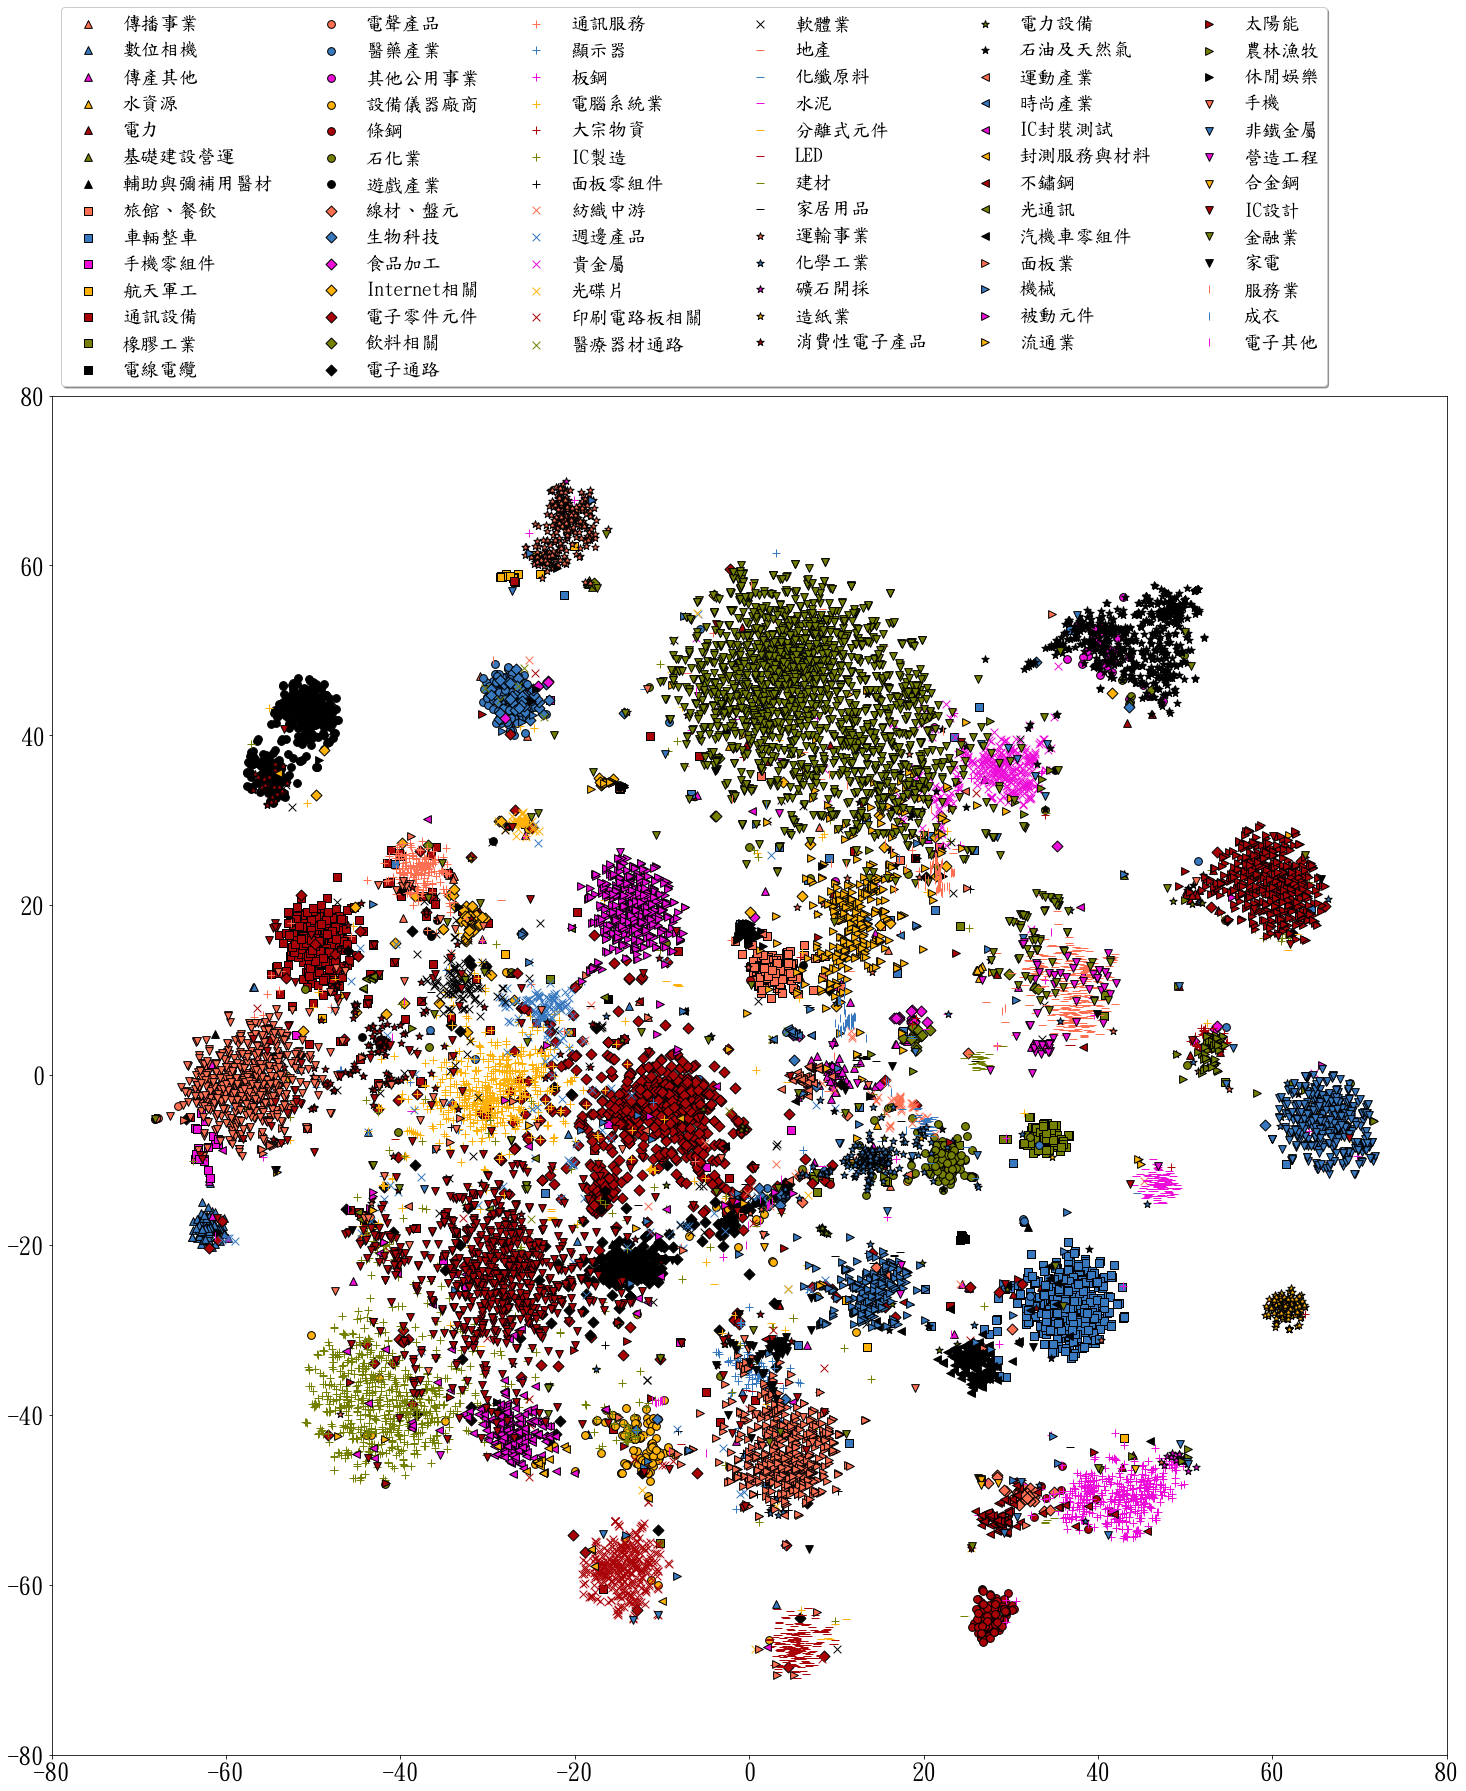

In [4]:
#plot
c=label
color=["#ff6f52","#3778bf","#ed0dd9","#feb209","#a90308","#758000","0"]
marker=["^","s","o","D","+","x","_","*","<",">","v","|"]
import matplotlib
plt.figure(figsize=(25,25),)
for i,k in enumerate(set(c)):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],
                c=color[i%len(color)],s=60,linewidth=1,edgecolors="black",
#                 cmap="flag",
                marker=marker[(i//len(color))%len(marker)],
                label=k,)
plt.legend(fontsize=19,
#            mode="expand",
           ncol=6,
           loc='lower left',
           bbox_to_anchor=(0,1),fancybox=True,shadow=True)
plt.xlim((-80,80))
plt.ylim((-80,80))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("cosine.test.png")

## Visualization-Specific

(array([-80., -60., -40., -20.,   0.,  20.,  40.,  60.,  80.]),
 <a list of 9 Text yticklabel objects>)

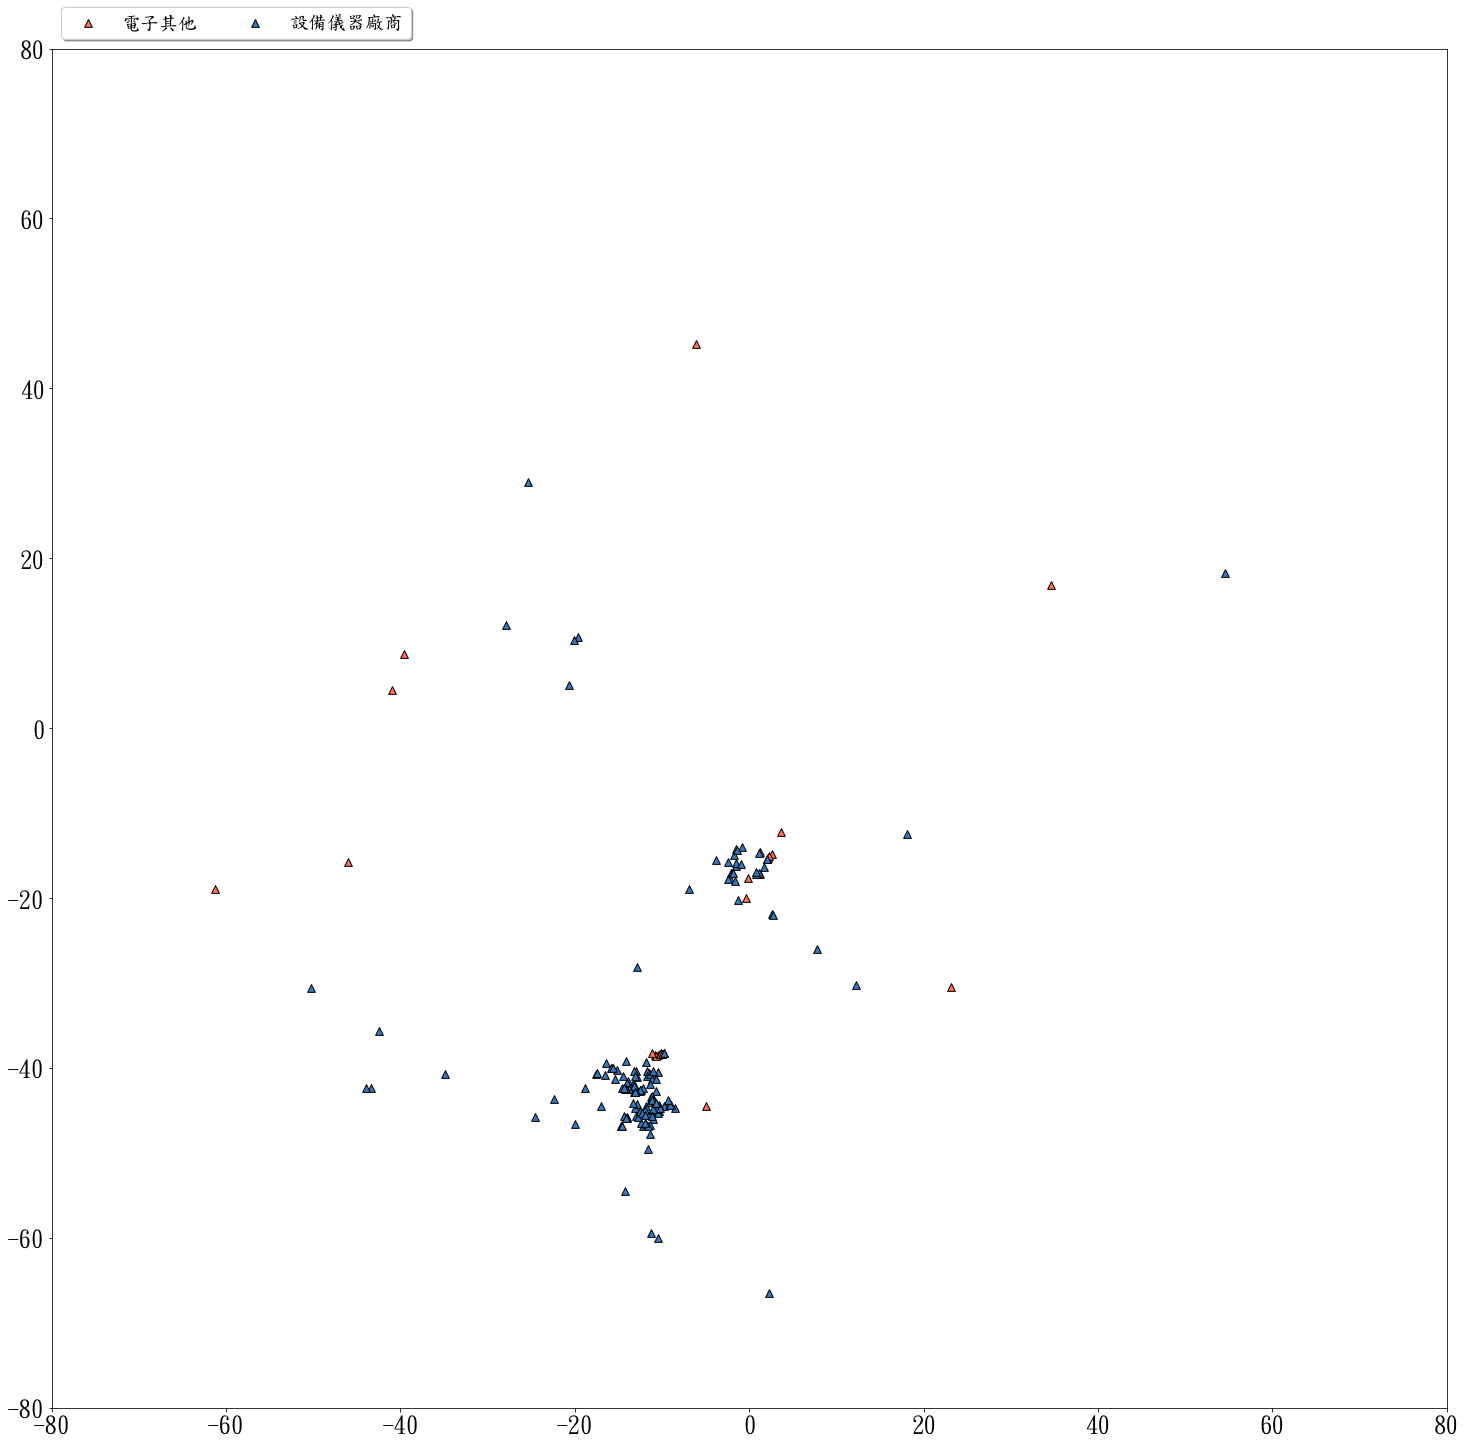

In [128]:
#plot
color=["#ff6f52","#3778bf","#ed0dd9","#feb209","#a90308","#758000","0"]
marker=["^","s","o","D","+","x","_","*","<",">","v","|"]
import matplotlib
plt.figure(figsize=(25,25),)
for i,k in enumerate(["電子其他","設備儀器廠商"]):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],
                c=color[i%len(color)],s=60,linewidth=1,edgecolors="black",
#                 cmap="flag",
                marker=marker[(i//len(color))%len(marker)],
                label=k,)
plt.legend(fontsize=19,
#            mode="expand",
           ncol=6,
           loc='lower left',
           bbox_to_anchor=(0,1),fancybox=True,shadow=True)
plt.xlim((-80,80))
plt.ylim((-80,80))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# plt.savefig("cosine.test.png")

In [76]:
## or "tsne_dict_indu_guid"
with open("tsne_dict_indu_guid.p","rb") as f:
    tsne_dict_indu_guid=pickle.load(f)

## Save Embeddingsa for Embedding projector

In [59]:
with open("emb.txt","w") as f:
    for i,j in intermediates_tsne:
        f.write("{}\t{}\n".format(i,j))

## Metadata for Embedding projector

In [93]:
labelorder=[]
for i in label:
    if i not in labelorder:labelorder.append(i)      

guid=[]
for i in labelorder:
    guid=guid+list(tsne_dict_indu_guid[i])

label2int={l:i for i,l in enumerate(set(label))}
with open("matadata.txt","w") as f:
    f.write("index\tindustry\tclass\tguid\n")
    for i,(indu,guid) in enumerate(zip(label,guid)):
        c=label2int[indu]
        f.write(("{}\t{}\t{}\t{}\n".format(i,indu,c,guid)))